<a href="https://colab.research.google.com/github/asalazaradams/python/blob/main/WebScraping_VivaAnuncios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VIVA ANUNCIOS

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
price=list()
bath=list()
bed=list()
loc=list()
area=list()
exp=list()
page_n = 2
titles = []
while page_n != 50:
      url = f"https://www.vivanuncios.com.mx/s-venta-inmuebles/hermosillo/page-{page_n}/v1c1097l11912p{page_n}"
      print(page_n)
      page_n = page_n + 1
      page = requests.get(url)
      soup = BeautifulSoup(page.content, "html.parser")
      results = soup.find(id="tileRedesign")
      post_elements = results.find_all("div", class_="tileV2 REAdTileV2 regular listView")
      from pandas.io.formats.format import NA
      for post_element in post_elements:
          price_element = post_element.find("span", class_="ad-price")
          bed_element = post_element.find("div", class_="chiplets-inline-block re-bedroom")
          bath_element = post_element.find("div", class_="chiplets-inline-block re-bathroom")
          loc_element = post_element.find("b")
          area_element=post_element.find("div", class_="chiplets-inline-block surface-area")
          exp_element= post_element.find("div", class_="expanded-description")
         
          if price_element is not None:
              p_e= price_element.get_text()
              p_e=p_e.replace("\n","")
              p_e=p_e.replace("$","")
              p_e=p_e.replace(",","")
              p_e=p_e.replace("USD","")
              price.append(int(p_e))
          else:  price.append('NaN')

    
          if bath_element is not None:
              ba_e= bath_element.get_text()
              ba_e=ba_e.replace("+","")
              bath.append(int(ba_e))
          else: bath.append('NaN')
    
          if bed_element is not None:
              be_e= bed_element.get_text()
              be_e=be_e.replace("+","")
              bed.append(int(be_e))
          else: bed.append('NaN')

          if loc_element is not None:
              loc.append(loc_element.get_text())
          else: loc.append('NaN')

          if area_element is not None:
              a_e= area_element.get_text()
              a_e=a_e.replace("m²","")
              area.append(int(a_e))
          else: area.append('NaN')

          if exp_element is not None:
              exp.append(exp_element.get_text())
          else: 
              exp.append('NaN')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
df=pd.DataFrame()

In [ ]:
df['price']=price
df['bed']=bed
df['bath']=bath
df['area']=area
df['loc']=loc
df['exp']=exp

In [ ]:
df.head()

,price,bed,bath,area,loc,exp
0,6800000,3,3,333,Centro,AMPLIA CASA EN VENTA EN LA COLONIA PITIC CON 3...
1,7096700,3,3,574,Modelo,LOTE 383\r\n??COUNTRY CLUB\r\n??574.16 m2 terr...
2,8995000,4,3,351,Residencial Los Santos,LOS SANTOS RESIDENCIAL\r\n\r\nHermosa propieda...
3,6050910,2,1,1,Pitic,UNA ALTACOMUNIDAD A TU ALCANCE\r\n\r\nDescubre...
4,8000000,4,3,933,Pitic,"VENTA | PITIC \r\n\r\nCasa en esquina, ubicada..."


In [ ]:
df.shape

(984, 6)

In [ ]:
type(df['price'])

pandas.core.series.Series

In [ ]:
df=df.dropna()

In [ ]:
df["price"]=pd.to_numeric(df["price"],errors='coerce')

In [ ]:
df["area"]=pd.to_numeric(df["area"],errors='coerce')

In [ ]:
df["bed"]=pd.to_numeric(df["bed"],errors='coerce')

In [ ]:
df["bath"]=pd.to_numeric(df["bath"],errors='coerce')

In [ ]:
import numpy as np

In [ ]:
df["logprice"]=np.log(df["price"])

In [ ]:
df["logarea"]=np.log(df["area"])

In [ ]:
df.loc[df['exp'].str.contains('Remate|REMATE|remates bancarios|remate|remata|recuperación|jurídico|Gutza'), 'remate'] = 1
df.loc[df['exp'].str.contains('alberca|Alberca'), 'alberca'] = 1
df.loc[df['exp'].str.contains('Deparmentos|departamentos|departamento|Departamento'), 'depto'] = 1
#datos.loc[datos['exp'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hottub_sauna_pool'] = 1
#datos.loc[datos['exp'].str.contains('Gym|gym'), 'gym'] = 1
#datos.loc[datos['exp'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets'] = 1



In [ ]:
df['remate']=df['remate'].fillna(0)
df['alberca']=df['alberca'].fillna(0)
df['depto']=df['depto'].fillna(0)

In [ ]:
df['remate'].mean()

0.10975609756097561

MODELO DE REGRESION

In [ ]:
# Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df = df[df['price'] > 300000] 
df = df[df['area'] > 40] 
df = df[df['area'] < 2000] 

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     19.82
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          2.90e-149
Time:                        18:29:49   Log-Likelihood:                -269.16
No. Observations:                 681   AIC:                             876.3
Df Residuals:                     512   BIC:                             1641.
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

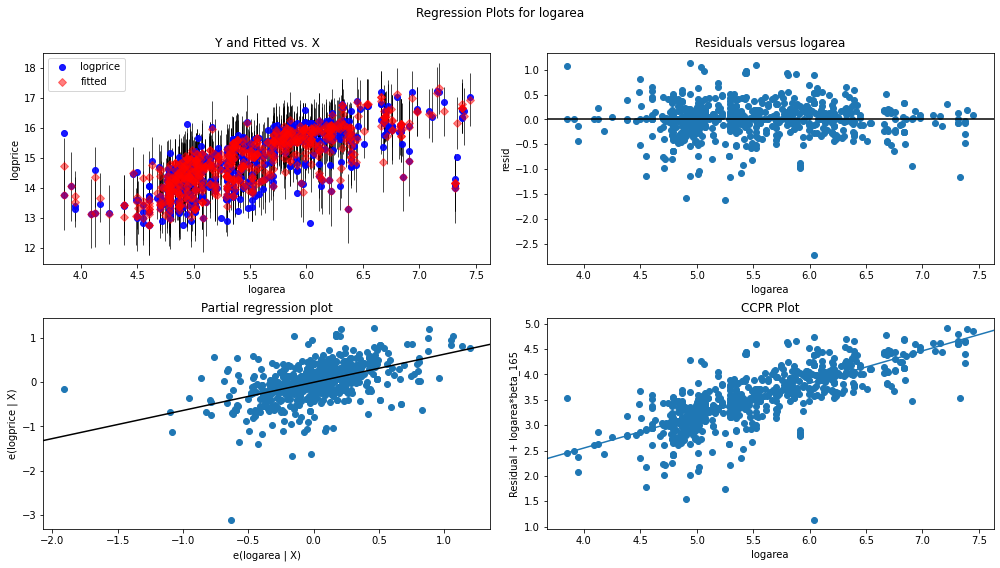

In [ ]:
model = ols('logprice ~ bed+bath+logarea+remate+alberca+depto+loc',
                   data=df).fit()

#linear_model = ols('logprice ~ logbed+logbed2+review_scores_value+review2+number_of_reviews+room_type+accommodates+neighbourhood_cleansed+latitude+latitude2+longitude+longitude2',data=datos).fit()

# presentamos el resumen del modelo
print(model.summary())
  
# modificamos tamaño de imagenes
fig = plt.figure(figsize=(14, 8))
  
# creamos plots de regresion
fig = sm.graphics.plot_regress_exog(model,
                                    'logarea',
                                    fig=fig)

In [ ]:
import numpy as np
np.exp(.1)

1.1051709180756477

In [ ]:
bano=3
log_area=np.log(333)

In [ ]:
log_area

5.3230099791384085

In [ ]:
np.exp(10.4075 + 0.6 + 0.1927*bano +  0.6*log_area)

3507750.455067532